In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import IPython.display
import numpy as np
from pycaret.time_series import TSForecastingExperiment
import os
import plotly.express as px
from pmdarima import auto_arima
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [2]:
df_3 = pd.read_csv(
                r'../data/01_raw/incidents-16-06-2023.csv').set_index('date_exploitation').iloc[::-1]

In [3]:
df_3

,etat_failed,etat_passed,avg_failed_duree,avg_succeed_duree
date_exploitation,,,,
2023-06-10,45,13516,4.533333,465.885099
2023-06-11,46,13588,3.282609,466.019429
2023-06-12,51,13561,18.313725,471.893223
2023-06-13,64,13777,157.796875,478.133048
2023-06-14,59,13682,4398.440678,414.661818
2023-06-15,91,13468,678.692308,442.418770
2023-06-16,72,13564,26.013889,437.134990


In [4]:
df = pd.read_csv(r'../data/01_raw/incidents.csv')
# df_2 = pd.read_csv(r'../data/01_raw/incidents-16-06-2023.csv')


In [5]:
# df_2 = df_2.iloc[::-1]

In [6]:
# df_2['date'] = df_2['date_exploitation']
# df_2 = df_2[['date', 'etat_failed']]

In [7]:
df = df[['date', 'etat_failed']]
df

,date,etat_failed
0,2021-11-18,88
1,2021-11-19,5
2,2021-11-22,12
3,2021-11-23,70
4,2021-11-24,67
...,...,...
551,2023-06-26,70
552,2023-06-27,70
553,2023-06-28,61
554,2023-06-29,55


In [8]:
# df = pd.concat([df, df_2], axis=0)

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.set_index('date', inplace=True)

In [11]:
df = df.asfreq('D')

In [12]:
df

,etat_failed
date,
2021-11-18,88.0
2021-11-19,5.0
2021-11-20,NaN
2021-11-21,NaN
2021-11-22,12.0
...,...
2023-06-26,70.0
2023-06-27,70.0
2023-06-28,61.0


In [13]:
df = df[['etat_failed']]
df['etat_failed'] = df['etat_failed'].fillna(0)
df

,etat_failed
date,
2021-11-18,88.0
2021-11-19,5.0
2021-11-20,0.0
2021-11-21,0.0
2021-11-22,12.0
...,...
2023-06-26,70.0
2023-06-27,70.0
2023-06-28,61.0


In [14]:
df['weekday'] = df.index.weekday
df

,etat_failed,weekday
date,,
2021-11-18,88.0,3
2021-11-19,5.0,4
2021-11-20,0.0,5
2021-11-21,0.0,6
2021-11-22,12.0,0
...,...,...
2023-06-26,70.0,0
2023-06-27,70.0,1
2023-06-28,61.0,2


In [15]:
#df_mon = df[df['weekday'] == 0]

In [16]:
df_check = df[['etat_failed']]

<Axes: xlabel='date'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

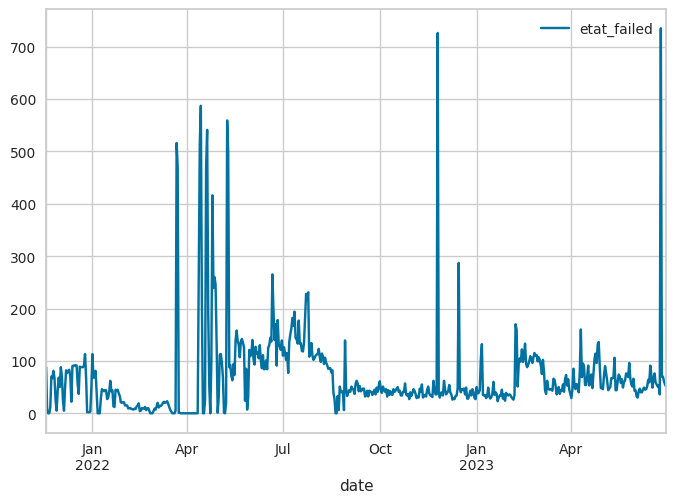

In [17]:
df_check.plot()

## Stationary check

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

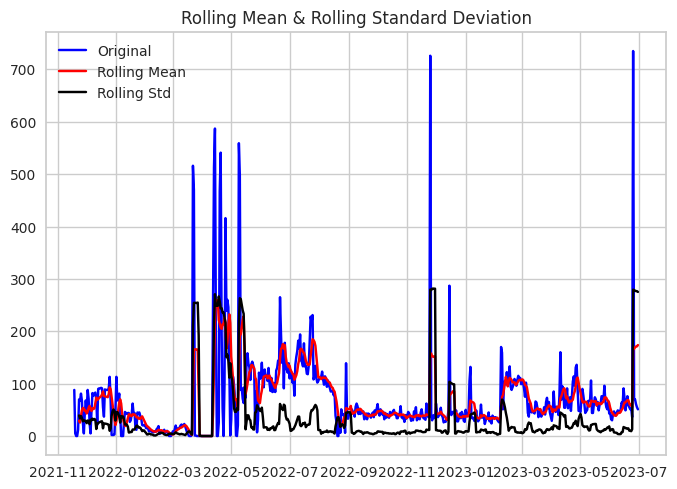

In [18]:
rolling_mean = df_check.rolling(window = 6).mean()
rolling_std = df_check.rolling(window = 6).std()
plt.plot(df_check, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [19]:
### Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [20]:
test_result=adfuller(df['etat_failed'])

In [21]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [22]:
adfuller_test(df['etat_failed'])

ADF Test Statistic : -3.0306045466643803
p-value : 0.03213349067386017
#Lags Used : 19
Number of Observations Used : 570
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [23]:
#df['etat (first difference)'] = df['etat_failed'] - df['etat_failed'].shift(1)

In [24]:
df['etat_failed'].shift(1)

date
2021-11-18      NaN
2021-11-19     88.0
2021-11-20      5.0
2021-11-21      0.0
2021-11-22      0.0
              ...  
2023-06-26    735.0
2023-06-27     70.0
2023-06-28     70.0
2023-06-29     61.0
2023-06-30     55.0
Freq: D, Name: etat_failed, Length: 590, dtype: float64

In [25]:
df['Seasonal First Difference']=df['etat_failed']-df['etat_failed'].shift(6)

In [26]:
df.head(14)

,etat_failed,weekday,Seasonal First Difference
date,,,
2021-11-18,88.0,3,NaN
2021-11-19,5.0,4,NaN
2021-11-20,0.0,5,NaN
2021-11-21,0.0,6,NaN
2021-11-22,12.0,0,NaN
2021-11-23,70.0,1,NaN
2021-11-24,67.0,2,-21.0
2021-11-25,81.0,3,76.0
2021-11-26,67.0,4,67.0


In [27]:
df.tail()

,etat_failed,weekday,Seasonal First Difference
date,,,
2023-06-26,70.0,0,11.0
2023-06-27,70.0,1,15.0
2023-06-28,61.0,2,10.0
2023-06-29,55.0,3,2.0
2023-06-30,51.0,4,15.0


In [28]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.796686957738109
p-value : 2.2914432983586717e-09
#Lags Used : 19
Number of Observations Used : 564
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='date'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

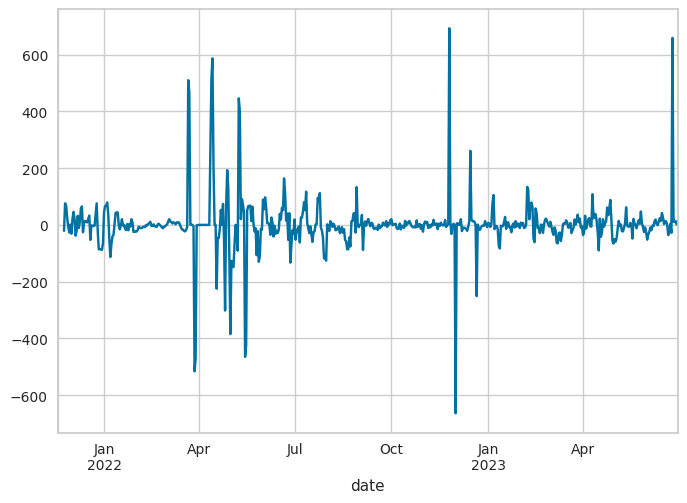

In [29]:
df['Seasonal First Difference'].plot()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

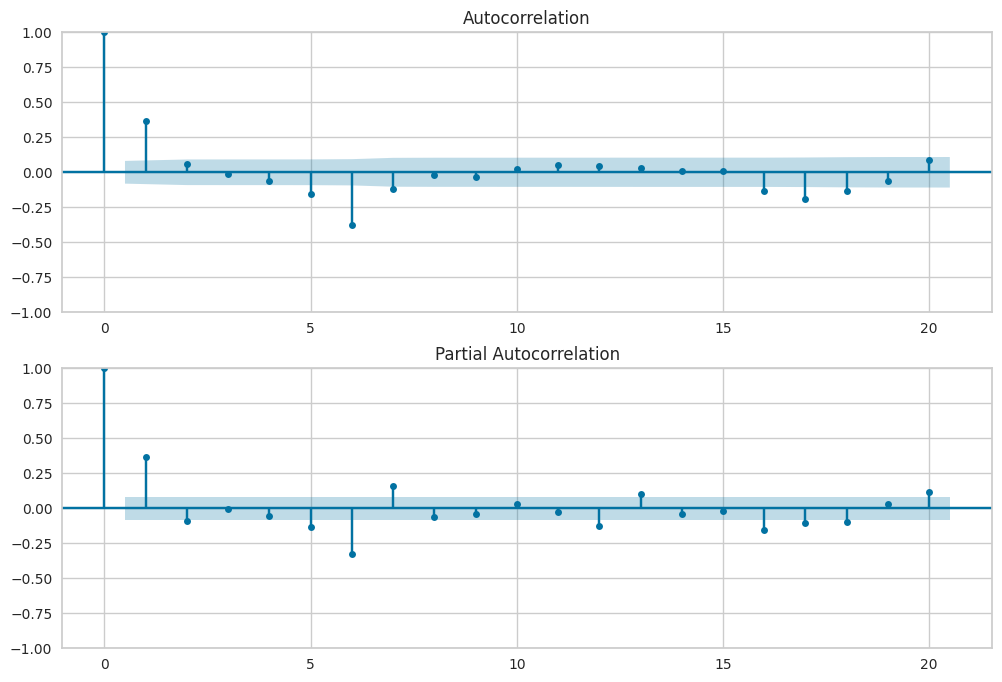

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[7:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[7:],lags=20,ax=ax2)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

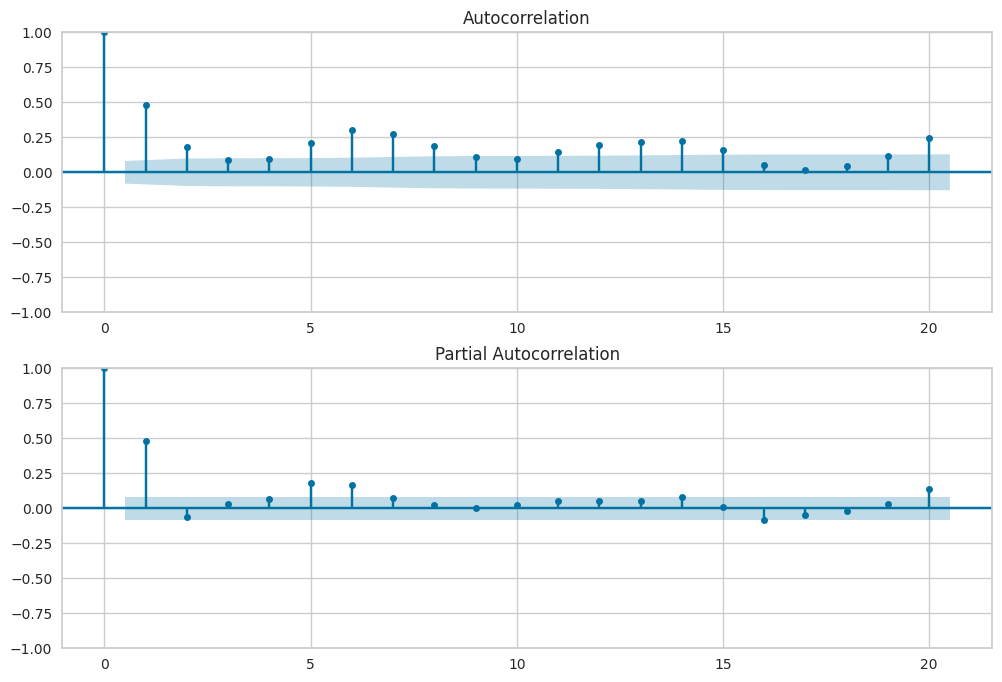

In [32]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['etat_failed'].iloc[7:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['etat_failed'].iloc[7:],lags=20,ax=ax2)

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model=ARIMA(df['etat_failed'],order=(1,1,1))
model_fit=model.fit()

In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            etat_failed   No. Observations:                  590
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3348.018
Date:                Fri, 30 Jun 2023   AIC                           6702.036
Time:                        11:44:56   BIC                           6715.171
Sample:                    11-18-2021   HQIC                          6707.153
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3765      0.018     21.428      0.000       0.342       0.411
ma.L1         -0.9512      0.011    -82.930      0.000      -0.974      -0.929
sigma2      5053.6103     63.008     80.206      0.000    4930.117    5177.104
===================================================================================
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):             46076.18
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             5.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

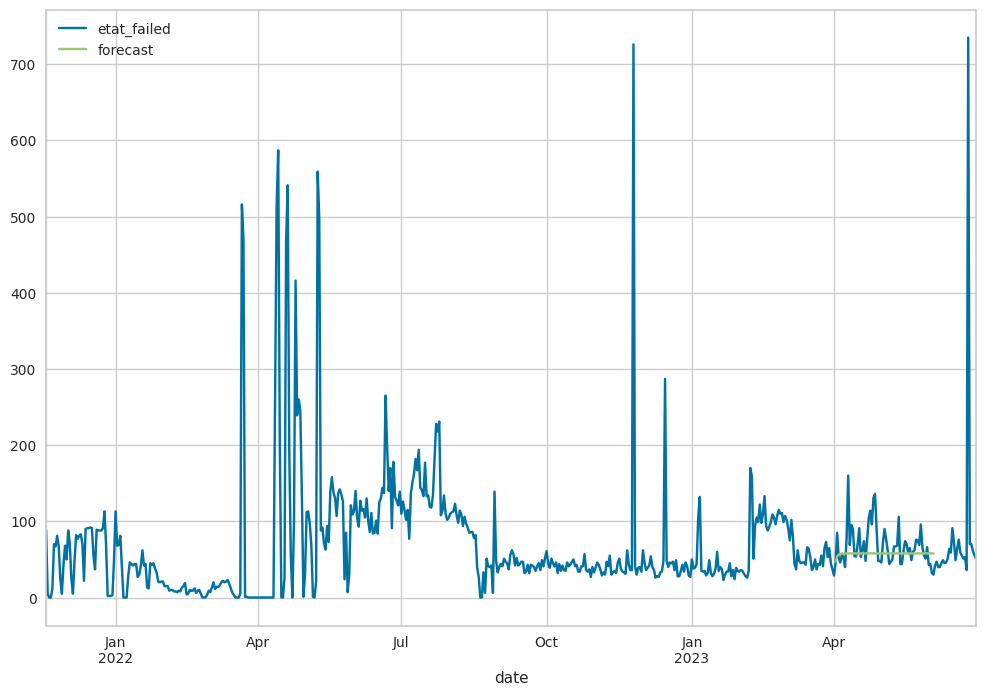

In [36]:
df['forecast']=model_fit.predict(start=500,end=562,dynamic=True)
df[['etat_failed','forecast']].plot(figsize=(12,8))

In [37]:
import statsmodels.api as sm

In [38]:
model=sm.tsa.statespace.SARIMAX(df['etat_failed'],order=(1, 1, 1),seasonal_order=(1,1,1,7))
results=model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75332D+00    |proj g|=  8.29625D-02

At iterate    5    f=  5.71057D+00    |proj g|=  4.69083D-03



At iterate   10    f=  5.64270D+00    |proj g|=  5.69730D-02

At iterate   15    f=  5.63742D+00    |proj g|=  5.46592D-04

At iterate   20    f=  5.63294D+00    |proj g|=  3.81581D-02

At iterate   25    f=  5.63179D+00    |proj g|=  8.85410D-03

At iterate   30    f=  5.63159D+00    |proj g|=  7.37173D-03

At iterate   35    f=  5.62573D+00    |proj g|=  2.39338D-02

At iterate   40    f=  5.62392D+00    |proj g|=  8.92212D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     60      1     0     0   9.280D-06   5.624D+00
  F =   5.6238596564711623     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

In [39]:
len(df)

590

<Axes: xlabel='date'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

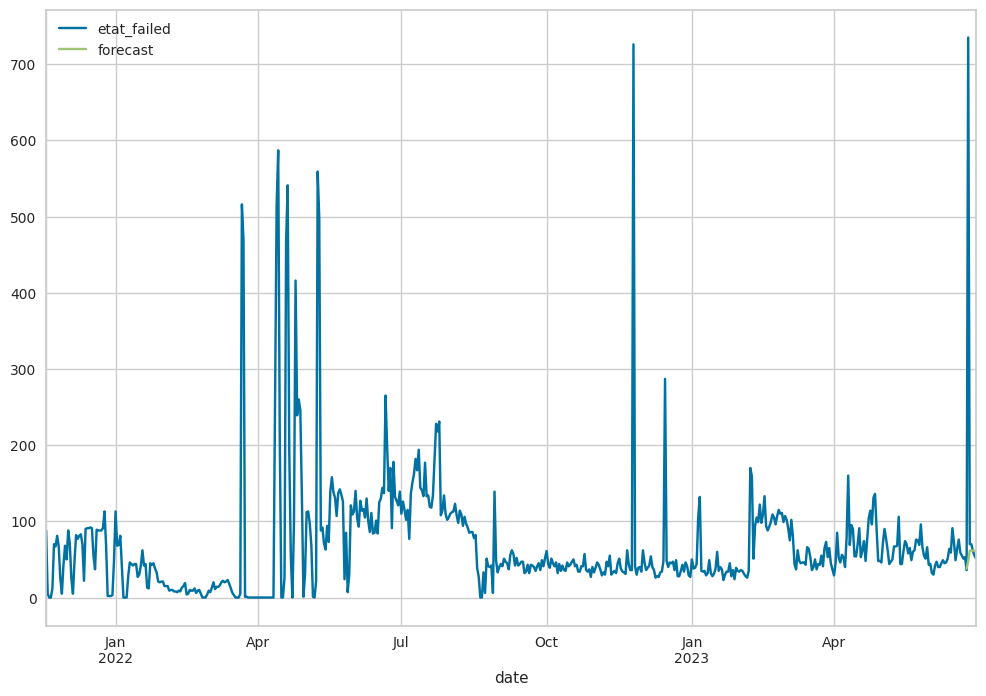

In [40]:
start, end = (len(df) - 7, len(df))

df['forecast']=results.predict(start=start,end=end,dynamic=True)
df[['etat_failed','forecast']].plot(figsize=(12,8))

<Axes: xlabel='date'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

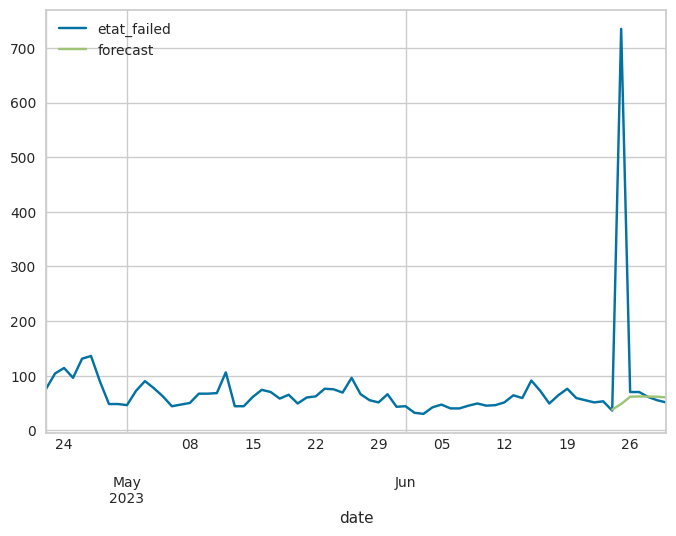

In [41]:
df[['etat_failed', 'forecast']].tail(70).plot()

In [42]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,8)]

In [43]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [44]:
future_datest_df

,etat_failed,weekday,Seasonal First Difference,forecast
2023-07-01,NaN,NaN,NaN,NaN
2023-07-02,NaN,NaN,NaN,NaN
2023-07-03,NaN,NaN,NaN,NaN
2023-07-04,NaN,NaN,NaN,NaN
2023-07-05,NaN,NaN,NaN,NaN
2023-07-06,NaN,NaN,NaN,NaN
2023-07-07,NaN,NaN,NaN,NaN


In [45]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

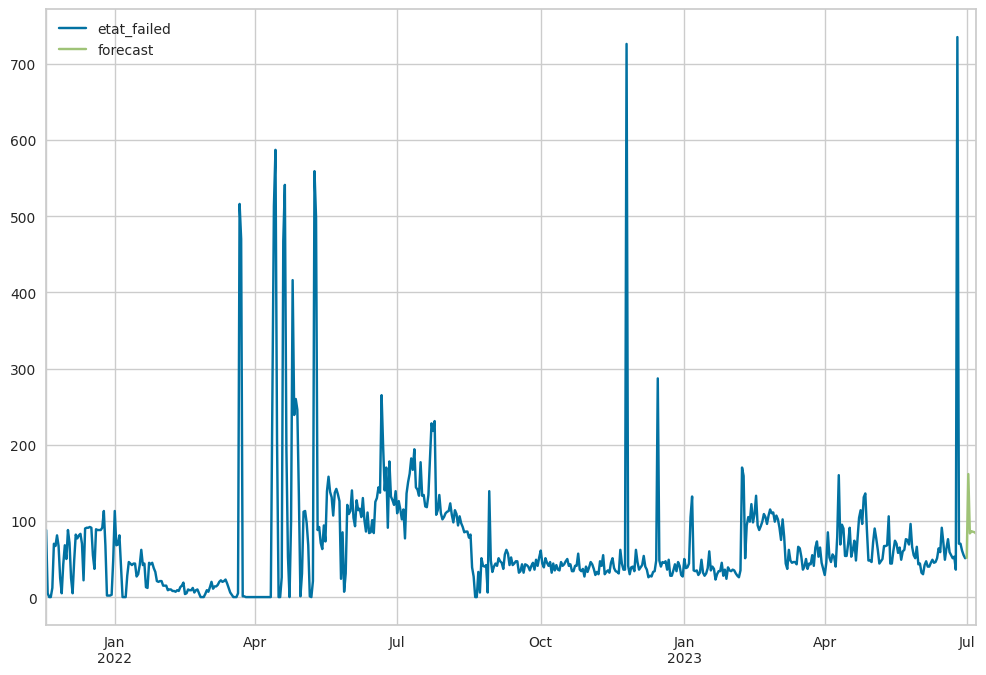

In [46]:
start, end = (len(future_df) - 7, len(future_df))
future_df['forecast'] = results.predict(start = start, end=end, dynamic= True)  
future_df[['etat_failed', 'forecast']].plot(figsize=(12, 8)) 

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

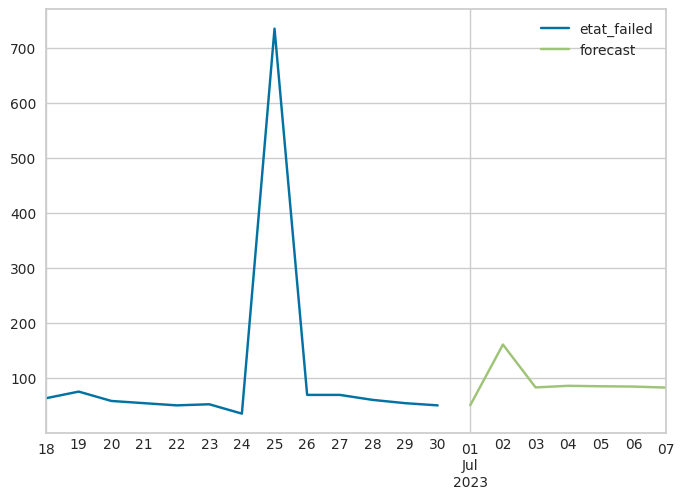

In [47]:
future_df[['etat_failed', 'forecast']].tail(20).plot()

In [48]:
df.tail(62)

,etat_failed,weekday,Seasonal First Difference,forecast
date,,,,
2023-04-30,48.0,6,-66.0,NaN
2023-05-01,46.0,0,-50.0,NaN
2023-05-02,72.0,1,-59.0,NaN
2023-05-03,90.0,2,-46.0,NaN
2023-05-04,77.0,3,-12.0,NaN
...,...,...,...,...
2023-06-26,70.0,0,11.0,61.448084
2023-06-27,70.0,1,15.0,61.940864
2023-06-28,61.0,2,10.0,61.661064


In [49]:
df['AE'] = abs(df['etat_failed'] - df['forecast'])

In [50]:
df['AE'].tail(62).mean()

103.11360221133509

In [51]:
df['etat_failed'].mode()

0    0.0
Name: etat_failed, dtype: float64

In [52]:
future_df.tail()

,etat_failed,weekday,Seasonal First Difference,forecast
2023-07-03,NaN,NaN,NaN,83.578099
2023-07-04,NaN,NaN,NaN,86.496213
2023-07-05,NaN,NaN,NaN,85.659884
2023-07-06,NaN,NaN,NaN,85.135834
2023-07-07,NaN,NaN,NaN,83.272042


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

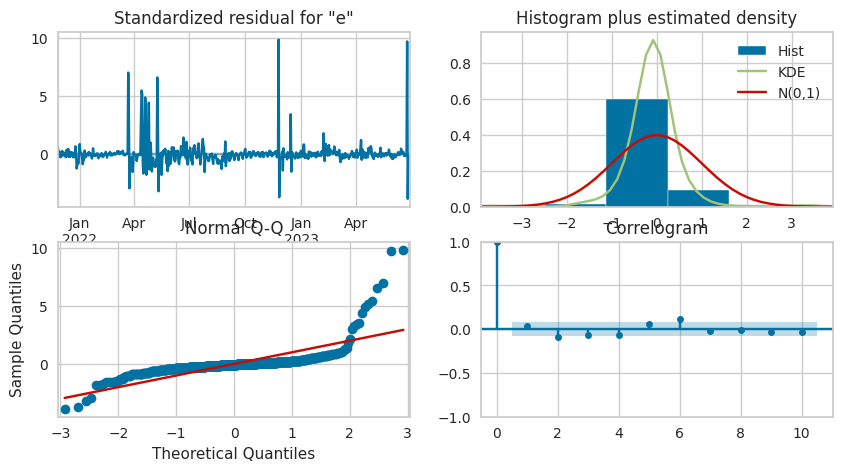

Ljung-box p-values: 
[0.30888934 0.05266724 0.03392042 0.02495104 0.02195421 0.00189556
 0.00369119 0.00692009 0.0094575  0.01396114 0.01765175 0.01526355
 0.02336396 0.02527074]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       etat_failed   No. Observations:                  590
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -3318.077
Date:                           Fri, 30 Jun 2023   AIC                           6646.154
Time:                                   11:51:04   BIC                           6667.987
Sample:                               11-18-2021   HQIC                          6654.665
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3664      0.021     17.408      0.000       0.325       0.408
ma.L1         -0.9541      0.015    -63.363      0.000      -0.984      -0.925
ar.S.L7        0.1004      0.037      2.743      0.006       0.029       0.172
ma.S.L7       -0.9628      0.026    -37.193      0.000      -1.014      -0.912
sigma2      5058.2437     64.256     78.721      0.000    4932.305    5184.182
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):             44833.70
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             5.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
results.plot_diagnostics(figsize=(10, 5))
plt.show()
print("Ljung-box p-values: \n" +
str(results.test_serial_correlation(method="ljungbox")[0][1]))
results.summary()